# Bellwether Decision Tree Analysis

## Import Libaries

In [689]:
import pandas as pd
import numpy as np
import statistics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from graphviz import Source
from IPython.display import Image
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot

## Import & Clean Dataset

In [690]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)
pd.options.mode.chained_assignment = None

In [691]:
df = pd.read_csv('data/compiled_data/data_dropna.csv', index_col=0)

In [692]:
df.head()

fips    state   county  wins  poverty_rate_1960  poverty_rate_1970  \
1  1003  Alabama  Baldwin     3               41.8               22.6   
2  1005  Alabama  Barbour     3               65.7               43.7   
3  1007  Alabama     Bibb     3               56.8               38.2   
4  1009  Alabama   Blount     3               45.6               24.2   
5  1011  Alabama  Bullock     3               72.2               54.9   

   poverty_rate_1980  poverty_rate_1990  poverty_rate_2000  poverty_rate_2010  \
1               16.2               14.3               10.1               13.3   
2               30.8               25.2               26.8               26.1   
3               21.2               21.2               20.6               16.5   
4               18.0               15.3               11.7               14.7   
5               35.4               36.5               33.5               22.2   

   population_1960  population_1970  population_1980  population_1990  \
1          49722.0          58776.0          77726.0          97227.0   
2          24975.0          22424.0          24533.0          24785.0   
3          14775.0          13761.0          15520.0          16304.0   
4          25414.0          26746.0          36244.0          38924.0   
5          13402.0          11817.0          10565.0          10340.0   

   population_2000  population_2010  persons_in_poverty_1960  \
1         138148.0           180970                  20773.0   
2          26239.0            24530                  16395.0   
3          19852.0            21794                   8386.0   
4          50499.0            56993                  11595.0   
5          10169.0            10313                   9680.0   

   persons_in_poverty_1970  persons_in_poverty_1980  persons_in_poverty_1990  \
1                  13304.0                  12616.0                  13947.0   
2                   9788.0                   7559.0                   6244.0   
3                   5256.0                   3296.0                   3454.0   
4                   6462.0                   6527.0                   5938.0   
5                   6492.0                   3745.0                   3776.0   

   persons_in_poverty_2000  persons_in_poverty_2010  \
1                  14018.0                    24002   
2                   7032.0                     6395   
3                   4091.0                     3594   
4                   5930.0                     8396   
5                   3405.0                     2286   

   rural_urban_continuum_code_2013  urban_influence_code_2013  metro_2013  \
1                              3.0                        2.0         1.0   
2                              6.0                        6.0         0.0   
3                              1.0                        1.0         1.0   
4                              1.0                        1.0         1.0   
5                              6.0                        6.0         0.0   

   civilian_labor_force_2000  civilian_labor_force_2001  \
1                      69533                      69161   
2                      11373                      11250   
3                       8565                       9081   
4                      25106                      25305   
5                       3971                       3912   

   civilian_labor_force_2002  civilian_labor_force_2003  \
1                      69169                      72299   
2                      10971                      10977   
3                       8933                       8836   
4                      25757                      25900   
5                       3877                       3979   

   civilian_labor_force_2004  civilian_labor_force_2005  \
1                      74772                    76804.0   
2                      10633                    10760.0   
3                       8843                     8861.0   
4                      26208    

In [693]:
len(df)

3021

In [694]:
# drop all unnecessary columns
df.drop(df.columns[[0,1,2]], axis=1, inplace=True)

In [695]:
df.head()

wins  poverty_rate_1960  poverty_rate_1970  poverty_rate_1980  \
1     3               41.8               22.6               16.2   
2     3               65.7               43.7               30.8   
3     3               56.8               38.2               21.2   
4     3               45.6               24.2               18.0   
5     3               72.2               54.9               35.4   

   poverty_rate_1990  poverty_rate_2000  poverty_rate_2010  population_1960  \
1               14.3               10.1               13.3          49722.0   
2               25.2               26.8               26.1          24975.0   
3               21.2               20.6               16.5          14775.0   
4               15.3               11.7               14.7          25414.0   
5               36.5               33.5               22.2          13402.0   

   population_1970  population_1980  population_1990  population_2000  \
1          58776.0          77726.0          97227.0         138148.0   
2          22424.0          24533.0          24785.0          26239.0   
3          13761.0          15520.0          16304.0          19852.0   
4          26746.0          36244.0          38924.0          50499.0   
5          11817.0          10565.0          10340.0          10169.0   

   population_2010  persons_in_poverty_1960  persons_in_poverty_1970  \
1           180970                  20773.0                  13304.0   
2            24530                  16395.0                   9788.0   
3            21794                   8386.0                   5256.0   
4            56993                  11595.0                   6462.0   
5            10313                   9680.0                   6492.0   

   persons_in_poverty_1980  persons_in_poverty_1990  persons_in_poverty_2000  \
1                  12616.0                  13947.0                  14018.0   
2                   7559.0                   6244.0                   7032.0   
3                   3296.0                   3454.0                   4091.0   
4                   6527.0                   5938.0                   5930.0   
5                   3745.0                   3776.0                   3405.0   

   persons_in_poverty_2010  rural_urban_continuum_code_2013  \
1                    24002                              3.0   
2                     6395                              6.0   
3                     3594                              1.0   
4                     8396                              1.0   
5                     2286                              6.0   

   urban_influence_code_2013  metro_2013  civilian_labor_force_2000  \
1                        2.0         1.0                      69533   
2                        6.0         0.0                      11373   
3                        1.0         1.0                       8565   
4                        1.0         1.0                      25106   
5                        6.0         0.0                       3971   

   civilian_labor_force_2001  civilian_labor_force_2002  \
1                      69161                      69169   
2                      11250                      10971   
3                       9081                       8933   
4                      25305                      25757   
5                       3912                       3877   

   civilian_labor_force_2003  civilian_labor_force_2004  \
1                      72299                      74772   
2                      10977                      10633   
3                       8836                       8843   
4                      25900                      26208   
5                       3979                       3880   

   civilian_labor_force_2005  civilian_labor_force_2006  \
1                    76804.0                    79711.0   
2                    10760.0                    10705.0   
3                     8861.0                     8850.0   
4             

In [696]:
# for counties that predicted 5 or more elections, replace "wins" column with 1; otherwise, replace with 0
count = 0
for x in df['wins']:
    if df.iloc[count, 0] >= 5:
        df.iloc[count, 0] = 1
    else:
        df.iloc[count, 0] = 0
    count += 1

In [697]:
df.head()

wins  poverty_rate_1960  poverty_rate_1970  poverty_rate_1980  \
1     0               41.8               22.6               16.2   
2     0               65.7               43.7               30.8   
3     0               56.8               38.2               21.2   
4     0               45.6               24.2               18.0   
5     0               72.2               54.9               35.4   

   poverty_rate_1990  poverty_rate_2000  poverty_rate_2010  population_1960  \
1               14.3               10.1               13.3          49722.0   
2               25.2               26.8               26.1          24975.0   
3               21.2               20.6               16.5          14775.0   
4               15.3               11.7               14.7          25414.0   
5               36.5               33.5               22.2          13402.0   

   population_1970  population_1980  population_1990  population_2000  \
1          58776.0          77726.0          97227.0         138148.0   
2          22424.0          24533.0          24785.0          26239.0   
3          13761.0          15520.0          16304.0          19852.0   
4          26746.0          36244.0          38924.0          50499.0   
5          11817.0          10565.0          10340.0          10169.0   

   population_2010  persons_in_poverty_1960  persons_in_poverty_1970  \
1           180970                  20773.0                  13304.0   
2            24530                  16395.0                   9788.0   
3            21794                   8386.0                   5256.0   
4            56993                  11595.0                   6462.0   
5            10313                   9680.0                   6492.0   

   persons_in_poverty_1980  persons_in_poverty_1990  persons_in_poverty_2000  \
1                  12616.0                  13947.0                  14018.0   
2                   7559.0                   6244.0                   7032.0   
3                   3296.0                   3454.0                   4091.0   
4                   6527.0                   5938.0                   5930.0   
5                   3745.0                   3776.0                   3405.0   

   persons_in_poverty_2010  rural_urban_continuum_code_2013  \
1                    24002                              3.0   
2                     6395                              6.0   
3                     3594                              1.0   
4                     8396                              1.0   
5                     2286                              6.0   

   urban_influence_code_2013  metro_2013  civilian_labor_force_2000  \
1                        2.0         1.0                      69533   
2                        6.0         0.0                      11373   
3                        1.0         1.0                       8565   
4                        1.0         1.0                      25106   
5                        6.0         0.0                       3971   

   civilian_labor_force_2001  civilian_labor_force_2002  \
1                      69161                      69169   
2                      11250                      10971   
3                       9081                       8933   
4                      25305                      25757   
5                       3912                       3877   

   civilian_labor_force_2003  civilian_labor_force_2004  \
1                      72299                      74772   
2                      10977                      10633   
3                       8836                       8843   
4                      25900                      26208   
5                       3979                       3880   

   civilian_labor_force_2005  civilian_labor_force_2006  \
1                    76804.0                    79711.0   
2                    10760.0                    10705.0   
3                     8861.0                     8850.0   
4             

In [698]:
len(df[df['wins'] == 1])

134

In [699]:
len(df[df['wins'] == 0])

2887

## Create Decision Tree

In [700]:
# store all features except wins in x
# store wins in y
x = df.loc[:, df.columns != 'wins']
y = df.wins

In [701]:
# split data into 75% training and 25% testing
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25,random_state=0)

# define tree depth to be 5
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)

tree_model.fit(x_train, y_train)

y_pred = tree_model.predict(x_test)
(y_test - y_pred).map(lambda x: x*x).sum()

35

In [702]:
x_train.columns.values

array(['poverty_rate_1960', 'poverty_rate_1970', 'poverty_rate_1980',
       'poverty_rate_1990', 'poverty_rate_2000', 'poverty_rate_2010',
       'population_1960', 'population_1970', 'population_1980',
       'population_1990', 'population_2000', 'population_2010',
       'persons_in_poverty_1960', 'persons_in_poverty_1970',
       'persons_in_poverty_1980', 'persons_in_poverty_1990',
       'persons_in_poverty_2000', 'persons_in_poverty_2010',
       'rural_urban_continuum_code_2013', 'urban_influence_code_2013',
       'metro_2013', 'civilian_labor_force_2000',
       'civilian_labor_force_2001', 'civilian_labor_force_2002',
       'civilian_labor_force_2003', 'civilian_labor_force_2004',
       'civilian_labor_force_2005', 'civilian_labor_force_2006',
       'civilian_labor_force_2007', 'civilian_labor_force_2008',
       'civilian_labor_force_2009', 'civilian_labor_force_2010',
       'civilian_labor_force_2011', 'civilian_labor_force_2012',
       'civilian_labor_force_2013', 'c

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.09093
Feature: 2, Score: 0.06248
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

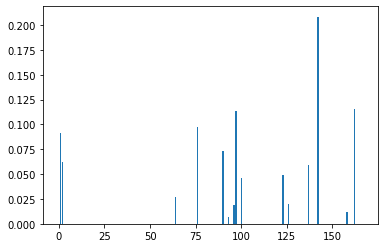

In [703]:
# calculate feature importance
importance = tree_model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [704]:
# feature with highest importance
x_train.columns[142]

'percent_bachelor_degree_or_higher_1990'

In [705]:
graph = Source(tree.export_graphviz(tree_model, out_file=None, feature_names=x_train.columns.values))

In [706]:
png = graph.pipe(format='png')

In [707]:
with open('poverty_rate_dtree.png','wb') as f:
    f.write(png)

In [708]:
Image(png)

In [709]:
# Assuming bellwethers are the positive class and nonbellwethers are the negative class:
# true negative: nonbellwethers classified correctly (top left)
# false positive: nonbellwethers classified incorrectly (bottom left)
# false negative: bellwethers classified incorrectly (top right)
# true positive: bellwethers classified correctly (bottom right)
metrics.confusion_matrix(y_test, y_pred)

array([[720,   5],
       [ 30,   1]])

In [710]:
# precision = tp / (tp + fp) - proportion of correctly identified bellwethers that were labeled bellwethers
# recall = tp / (tp + fn) - proportion of correctly identified bellwethers that were actually bellwethers
print(classification_report(y_test, y_pred, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       725
           1       0.17      0.03      0.05        31

    accuracy                           0.95       756
   macro avg       0.56      0.51      0.52       756
weighted avg       0.93      0.95      0.94       756



## Balancing Bellwethers and Nonbellwethers

In [711]:
# generate random sample of 134 bellwethers in df1
df1 = df[df.wins == 1].sample(134)

In [712]:
# generate random sample of 134 nonbellwethers and store in df2
df2 = df[df.wins == 0].sample(134)

In [713]:
# store both dataframes in df_new
df_new = df1.append(df2)

In [714]:
# store all features except wins in x_new
# store wins in y_new
x_new = df_new.loc[:, df_new.columns != 'wins']
y_new = df_new.wins

In [715]:
# split data into 75% training and 25% testing
x_train_new, x_test_new, y_train_new, y_test_new = \
    train_test_split(x_new, y_new, test_size=0.25,random_state=0)

# define tree depth to be 5
tree_model_new = DecisionTreeClassifier(random_state=0,max_depth=5)

tree_model_new.fit(x_train_new, y_train_new)

y_pred_new = tree_model_new.predict(x_test_new)
(y_test_new - y_pred_new).map(lambda x_new: x_new*x_new).sum()

28

In [716]:
x_train_new.columns.values

array(['poverty_rate_1960', 'poverty_rate_1970', 'poverty_rate_1980',
       'poverty_rate_1990', 'poverty_rate_2000', 'poverty_rate_2010',
       'population_1960', 'population_1970', 'population_1980',
       'population_1990', 'population_2000', 'population_2010',
       'persons_in_poverty_1960', 'persons_in_poverty_1970',
       'persons_in_poverty_1980', 'persons_in_poverty_1990',
       'persons_in_poverty_2000', 'persons_in_poverty_2010',
       'rural_urban_continuum_code_2013', 'urban_influence_code_2013',
       'metro_2013', 'civilian_labor_force_2000',
       'civilian_labor_force_2001', 'civilian_labor_force_2002',
       'civilian_labor_force_2003', 'civilian_labor_force_2004',
       'civilian_labor_force_2005', 'civilian_labor_force_2006',
       'civilian_labor_force_2007', 'civilian_labor_force_2008',
       'civilian_labor_force_2009', 'civilian_labor_force_2010',
       'civilian_labor_force_2011', 'civilian_labor_force_2012',
       'civilian_labor_force_2013', 'c

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.04249
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.04208
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

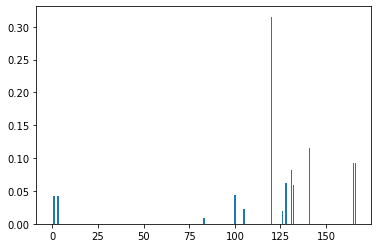

In [717]:
# calculate feature importance
importance_new = tree_model_new.feature_importances_

# summarize feature importance
for i,v in enumerate(importance_new):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance_new))], importance_new)
pyplot.show()

In [718]:
# feature with highest importance
x_train_new.columns[120]

'completed_college_1970'

In [719]:
graph_new = Source(tree.export_graphviz(tree_model_new, out_file=None, feature_names=x_train_new.columns.values))

In [720]:
png_new = graph_new.pipe(format='png')

In [721]:
with open('poverty_rate_dtree_new.png','wb') as f:
    f.write(png_new)

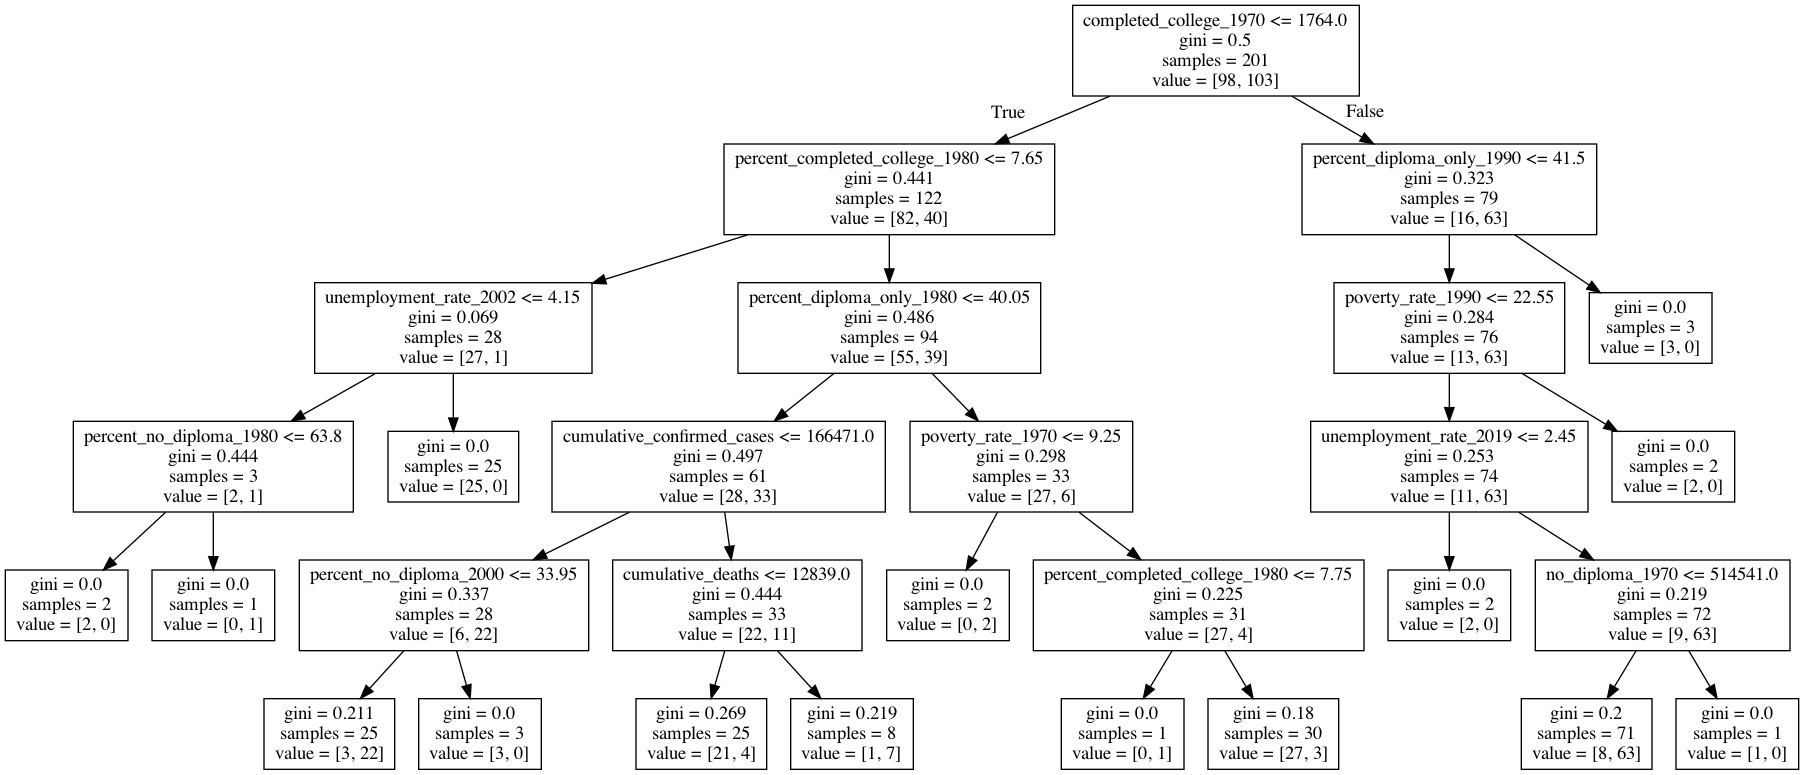

In [722]:
Image(png_new)

In [723]:
# Assuming bellwethers are the positive class and nonbellwethers are the negative class:
# true negative: nonbellwethers classified correctly (top left)
# false positive: nonbellwethers classified incorrectly (bottom left)
# false negative: bellwethers classified incorrectly (top right)
# true positive: bellwethers classified correctly (bottom right)
metrics.confusion_matrix(y_test_new, y_pred_new)

array([[19, 17],
       [11, 20]])

In [724]:
# precision = tp / (tp + fp) - proportion of correctly identified bellwethers that were labeled bellwethers
# recall = tp / (tp + fn) - proportion of correctly identified bellwethers that were actually bellwethers
print(classification_report(y_test_new, y_pred_new, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.63      0.53      0.58        36
           1       0.54      0.65      0.59        31

    accuracy                           0.58        67
   macro avg       0.59      0.59      0.58        67
weighted avg       0.59      0.58      0.58        67



## Average of 100 Runs After Balancing

In [725]:
# generate 100 random samples of 134 bellwethers and 134 nonbellwethers and store in main dict
main = {}
for x in range(100):
    main[x] = df[df.wins == 1].sample(134).append(df[df.wins == 0].sample(134))

In [726]:
# store all features except wins for each sample in x_average dict
# store wins for each sample in y_average dict
x_average = {}
y_average = {}
for x in range(100):
    x_average[x] = main[x].loc[:, main[x].columns != 'wins']
    y_average[x] = main[x].wins

In [727]:
x_train_average = {}
x_test_average = {}
y_train_average = {}
y_test_average = {}
tree_model_average = {}
y_pred_average = {}
for x in range(100):
    # split each sample into 75% training and 25% testing
    x_train_average[x], x_test_average[x], y_train_average[x], y_test_average[x] = \
        train_test_split(x_average[x], y_average[x], test_size=0.25,random_state=0)
    
    # define tree depth to be 5
    tree_model_average[x] = DecisionTreeClassifier(random_state=0,max_depth=5)
    
    tree_model_average[x].fit(x_train_average[x], y_train_average[x])
    
    x_temp = x_average[x]

    y_pred_average[x] = tree_model_average[x].predict(x_test_average[x])
    (y_test_average[x] - y_pred_average[x]).map(lambda x_temp: x_temp*x_temp).sum()

In [728]:
# copy tree_model_average dict into accuracy list
accuracy = []
for x in range(100):
    y = tree_model_average[x].score(x_test_average[x], y_test_average[x])
    accuracy.append(y)

Feature: 0, Score: 0.01052
Feature: 1, Score: 0.00753
Feature: 2, Score: 0.00571
Feature: 3, Score: 0.00678
Feature: 4, Score: 0.00707
Feature: 5, Score: 0.00510
Feature: 6, Score: 0.00347
Feature: 7, Score: 0.00097
Feature: 8, Score: 0.00195
Feature: 9, Score: 0.00054
Feature: 10, Score: 0.00190
Feature: 11, Score: 0.00113
Feature: 12, Score: 0.00512
Feature: 13, Score: 0.00473
Feature: 14, Score: 0.00940
Feature: 15, Score: 0.00595
Feature: 16, Score: 0.00348
Feature: 17, Score: 0.00571
Feature: 18, Score: 0.00226
Feature: 19, Score: 0.00346
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00137
Feature: 22, Score: 0.00026
Feature: 23, Score: 0.00013
Feature: 24, Score: 0.00040
Feature: 25, Score: 0.00022
Feature: 26, Score: 0.00022
Feature: 27, Score: 0.00392
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00403
Feature: 30, Score: 0.00038
Feature: 31, Score: 0.00022
Feature: 32, Score: 0.00044
Feature: 33, Score: 0.00091
Feature: 34, Score: 0.00027
Feature: 35, Score: 0.00000
Fe

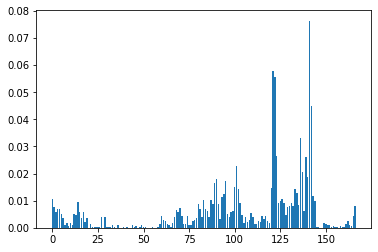

In [729]:
score_lists = [[] for x in range(167)]

for x in range(100):
    # extract feature importance for 100 runs
    importance_average = tree_model_average[x].feature_importances_
    
    # convert from np array to list
    importance_average.tolist()
    
    # append feature importance from each run to respective list
    for y in range(167):
        score_lists[y].append(importance_average[y])

# calculate mean importance for each feature
mean_list = []
for x in range(167):
    mean_list.append(statistics.mean(score_lists[x]))

# convert list of mean importances to array
mean_array = np.asarray(mean_list)

# print feature importance
for i,v in enumerate(mean_array):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(mean_array))], mean_array)
pyplot.show()



In [730]:
# feature with highest average importance
x_train_average[0].columns[141]

'percent_completed_college_1980'

Feature: 0, SD: 0.02210
Feature: 1, SD: 0.01751
Feature: 2, SD: 0.01731
Feature: 3, SD: 0.01779
Feature: 4, SD: 0.02102
Feature: 5, SD: 0.01499
Feature: 6, SD: 0.01184
Feature: 7, SD: 0.00763
Feature: 8, SD: 0.00879
Feature: 9, SD: 0.00539
Feature: 10, SD: 0.01025
Feature: 11, SD: 0.00614
Feature: 12, SD: 0.01701
Feature: 13, SD: 0.01650
Feature: 14, SD: 0.02362
Feature: 15, SD: 0.01747
Feature: 16, SD: 0.01598
Feature: 17, SD: 0.03192
Feature: 18, SD: 0.01116
Feature: 19, SD: 0.01225
Feature: 20, SD: 0.00000
Feature: 21, SD: 0.01043
Feature: 22, SD: 0.00257
Feature: 23, SD: 0.00133
Feature: 24, SD: 0.00286
Feature: 25, SD: 0.00219
Feature: 26, SD: 0.00223
Feature: 27, SD: 0.03477
Feature: 28, SD: 0.00000
Feature: 29, SD: 0.03421
Feature: 30, SD: 0.00382
Feature: 31, SD: 0.00222
Feature: 32, SD: 0.00310
Feature: 33, SD: 0.00699
Feature: 34, SD: 0.00271
Feature: 35, SD: 0.00000
Feature: 36, SD: 0.00871
Feature: 37, SD: 0.00000
Feature: 38, SD: 0.00000
Feature: 39, SD: 0.00301
Feature: 4

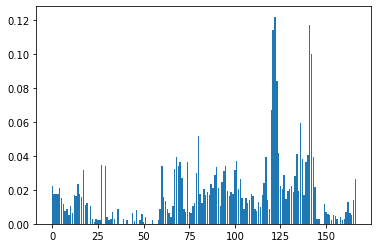

In [731]:
# calculate standard deviation for each feature
sd_list = []
for x in range(167):
    sd_list.append(statistics.stdev(score_lists[x]))

# convert list of standard deviations to array
sd_array = np.asarray(sd_list)

# print standard deviation
for i,v in enumerate(sd_array):
    print('Feature: %0d, SD: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(sd_array))], sd_array)
pyplot.show()


In [732]:
# classification report

precision_0 = []
recall_0 = []
f1_0 = []
support_0 = []
precision_1 = []
recall_1 = []
f1_1 = []
support_1 = []
accuracy = []


for x in range(100):
    report = classification_report(y_test_average[x], y_pred_average[x], output_dict=True)
    # matrix = metrics.confusion_matrix(y_test_average[x], y_pred_average[x])
    
    precision_0.append(report['0']['precision'])
    recall_0.append(report['0']['recall'])
    f1_0.append(report['0']['f1-score'])
    support_0.append(report['0']['support'])
    precision_1.append(report['1']['precision'])
    recall_1.append(report['1']['recall'])
    f1_1.append(report['1']['f1-score'])
    support_1.append(report['1']['support'])
    accuracy.append(report['accuracy'])
    
print('\nResults\nAccuracy: {}, {}'.format(statistics.mean(accuracy), statistics.stdev(accuracy)))
print('Precicion (0): {}, {}\nRecall (0): {}, {}\nF1-Score (0): {}, {}\nSupport (0): {}, {}'.format( 
    statistics.mean(precision_0), statistics.stdev(precision_0), 
    statistics.mean(recall_0), statistics.stdev(recall_0), 
    statistics.mean(f1_0), statistics.stdev(f1_0),
    statistics.mean(support_0), statistics.stdev(support_0)))
print('Precicion (1): {}, {}\nRecall (1): {}, {}\nF1-Score (1): {}, {}\nSupport (1): {}, {}'.format( 
    statistics.mean(precision_1), statistics.stdev(precision_1), 
    statistics.mean(recall_1), statistics.stdev(recall_1), 
    statistics.mean(f1_1), statistics.stdev(f1_1),
    statistics.mean(support_1), statistics.stdev(support_1)))


Results
Accuracy: 0.6286567164179104, 0.06185909753409815
Precicion (0): 0.6741777466579738, 0.06977380845570545
Recall (0): 0.6091666666666666, 0.10183310203910413
F1-Score (0): 0.6351024571597604, 0.07082304378785871
Support (0): 36, 0.0
Precicion (1): 0.5923415579009362, 0.06784073825558824
Recall (1): 0.6512903225806451, 0.11227961651222201
F1-Score (1): 0.6157823494132705, 0.07420975541657933
Support (1): 31, 0.0
